In [1]:
import pandas as pd
import numpy as np


## Importing Data

In [2]:
rawdata= pd.read_csv('Advertising.csv')

In [3]:
rawdata.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data=rawdata.drop(["Unnamed: 0"],axis=1)

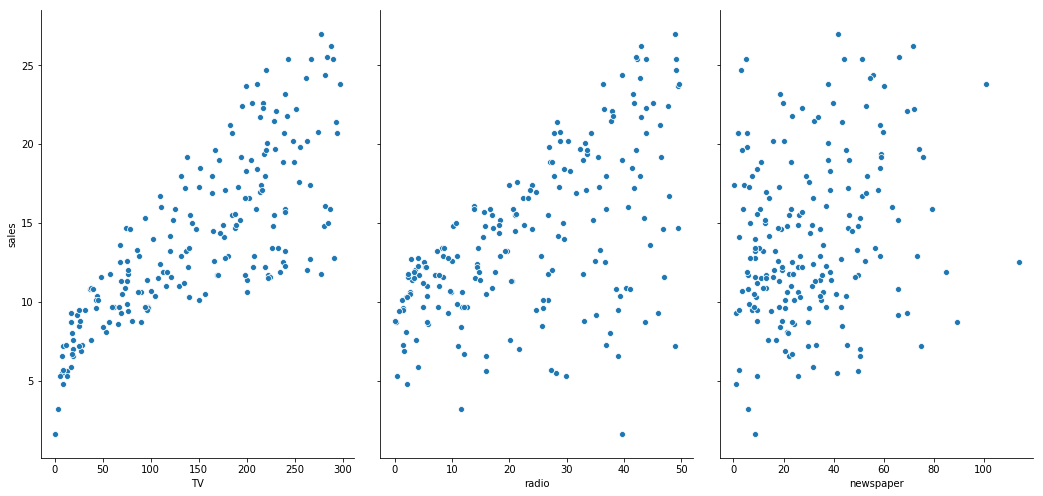

In [19]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7)

## Linear Regression

The scatter plot shows that the correlation of TV with sales are much more than the others. Now, we will use linear regression least square method to check the correlation coefficients.



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model for TV and Sales is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model for TV and Sales is: Y = 7.0326 + 0.047537X


This part gives us the linear estimation between TV advertisement and sales. We visualize this line in the next section of the code.

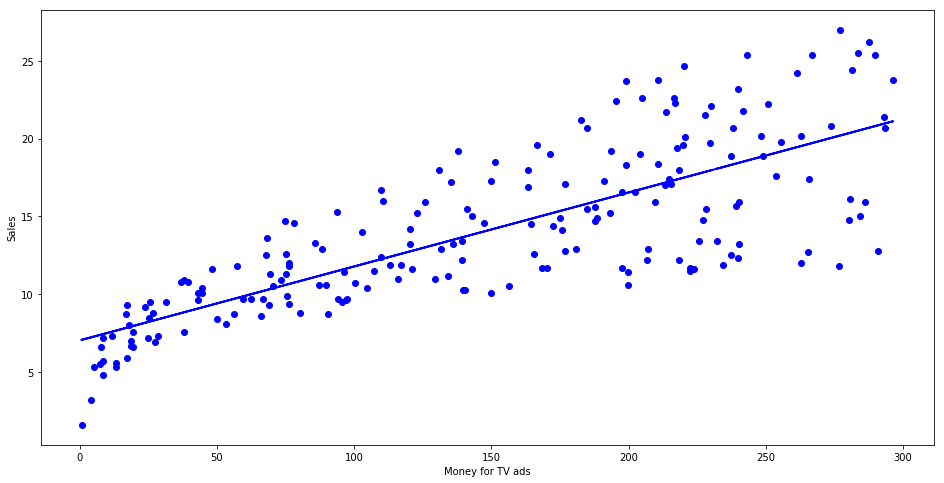

In [7]:
import matplotlib.pyplot as plt
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money for TV ads")
plt.ylabel("Sales")
plt.show()

Now, in the next piece of the code, we will see the table for R^2 and the p value for all the advertisment

In [8]:
for i in ['TV','radio', 'newspaper']:
    X = data[i]
    y = data['sales']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print "The summary for the relationship of sales with the advertisement in "+ i+ " is as follows:"
    print(est2.summary())

The summary for the relationship of sales with the advertisement in TV is as follows:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        15:24:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

If we see the R^2 value for TV, radio and the newspaper, they are 0.612, 0.332 and 0.052 respectively. Therefore, about 60% of the variability of sales is explained by the amount spent on TV ads but that is also not much. It also says, newspaper advertising has almost no effect individually on the sales.


Instead of fitting a separate simple linear regression model for each predictor, a better approach is to extend the simple linear regression modelso that it can directly accommodate multiple predictors. We can do this by multiple linear regression, which we will do on the next piece of code.

## Multi-Linear Regression

In [9]:
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0]
                            , reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

The linear model is: Y = 2.9389 + 0.045765*TV + 0.18853*radio + -0.0010375*newspaper


In [10]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.58e-96
Time:                        15:24:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

We see the R^2 value is much higher in multi regression that single ones. We see that p-value for TV and radio are very low, where for newspaper it is very high. This says, for sales advertising in newspaper is quite insignificant. Hence, we will try to find the correlation only using TV and radio again.

In [11]:
X = data.drop(['sales','newspaper'], axis=1)
y = data['sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio".format(reg.intercept_[0]
                            , reg.coef_[0][0], reg.coef_[0][1]))

The linear model is: Y = 2.9211 + 0.045755*TV + 0.18799*radio


In [12]:
x_plot, y_plot = np.meshgrid(np.linspace(data['TV'].values.min(), data['TV'].values.max(), 100),
                             np.linspace(data['radio'].values.min(), data['radio'].values.max(), 100))
onlyX = pd.DataFrame({'TV': x_plot.ravel(), 'radio': y_plot.ravel()})
fittedY= 2.9211+ 0.045755*x_plot+0.18799*y_plot


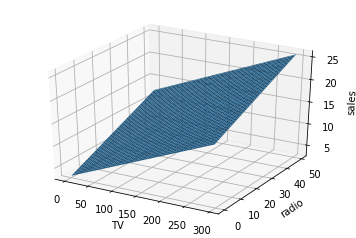

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')


surf = ax.plot_surface(x_plot, y_plot, fittedY)

The above 3d plot shows the correlation between sales with advertisement through TV and Radio. In the next piece of code we will try to create a model which can predict the sales using only TV and Radio.

## Prediction Model

In [14]:
from sklearn.model_selection import train_test_split
data_train,data_test= train_test_split(data, random_state=42)
data_train.head()

,TV,radio,newspaper,sales
114,78.2,46.8,34.5,14.6
173,168.4,7.1,12.8,11.7
5,8.7,48.9,75.0,7.2
126,7.8,38.9,50.6,6.6
117,76.4,0.8,14.8,9.4


In [15]:
X_train=data_train[['TV','radio']]
X_test=data_test[['TV','radio']]
Y_train=data_train[['sales']]
Y_test=data_test[['sales']]
print("Shape of X_train and Y_train is {}".format(X_train.shape)+" and {} respectively".format(Y_train.shape))
print("Shape of X_test and Y_test is {}".format(X_test.shape)+" and {} respectively".format(Y_test.shape))

Shape of X_train and Y_train is (150, 2) and (150, 1) respectively
Shape of X_test and Y_test is (50, 2) and (50, 1) respectively


In [16]:
Mult_reg= LinearRegression().fit(X_train,Y_train)
print("The Multiple Correlation Coefficient is {}".format(Mult_reg.score(X_train,Y_train)))

The Multiple Correlation Coefficient is 0.896554760321


In [17]:
y_predicted = Mult_reg.predict(X_test)

In [18]:
from sklearn.model_selection import cross_val_score

ln_model = LinearRegression()
cv_scores = cross_val_score(ln_model, X=X_train, y=Y_train, cv=6, n_jobs=3)
print(cv_scores)

[0.77331132 0.93502075 0.92835829 0.88903742 0.93847798 0.78734265]
